<center>

# **TALLER 6**  

---
## *Aprendizaje Supervisado*
### Árboles de Decisión



---

Sorting Hat

---

Introducción a la Inteligencia Artificial 2024-1


</center>

<center>

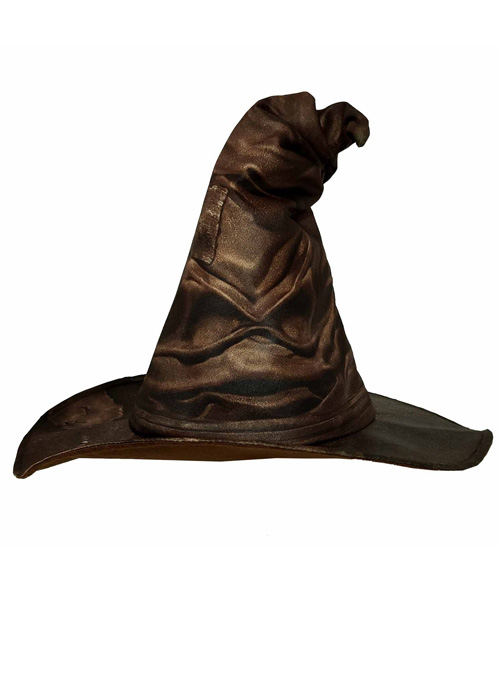
</center>

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Este dataset contiene distintos personajes de las novelas de Harry Potter y sus características humanas más significativas que los dividen en las 4 casas de Hogwarts.

El objetivo es usar árboles de decisión para clasificar un nuevo dato observado en una de las 4 casas.

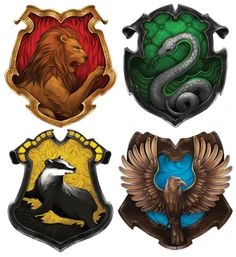

Cargamos el dataset

In [ ]:
from google.colab import files
import io

uploaded = files.upload()
Harry_df = pd.read_csv(io.BytesIO(uploaded["Harry_Potter.csv"]))

Saving Harry_Potter.csv to Harry_Potter.csv


Veamos la distribución de las casas

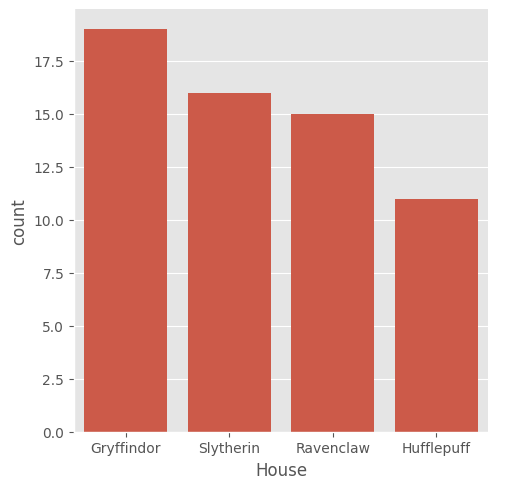

In [ ]:
g = sb.catplot(x='House', data=Harry_df, kind="count")

In [ ]:
print(Harry_df.groupby('House').size())

House
Gryffindor    19
Hufflepuff    11
Ravenclaw     15
Slytherin     16
dtype: int64


In [ ]:
Harry_potter_df = Harry_df.copy()

Veamos qué características tenemos:

**Features:**
**X:**

Bravery - Valentía

Ambition - Ambición

Loyalty - Lealtad

Intelligence - Inteligencia

Creativity - Creatividad

Cunning - Astucia

Hard Work - Trabajo duro

Chivalry - Caballería

Resourcefulness - Ingenio


**Target:**

**y:**

House - Casa

In [ ]:
Harry_potter_df

,Name,Bravery,Ambition,Loyalty,Intelligence,Creativity,Cunning,Hard Work,Chivalry,Resourcefulness,House
0,Harry Potter,High,Medium,High,Medium,Medium,Low,Medium,High,High,Gryffindor
1,Hermione Granger,High,Medium,High,Very High,High,Medium,High,Medium,Medium,Gryffindor
2,Draco Malfoy,Low,Very High,Low,Medium,Medium,Very High,Low,Low,Very High,Slytherin
3,Luna Lovegood,Medium,Low,Medium,High,Very High,Low,Medium,Low,Medium,Ravenclaw
4,Cedric Diggory,Medium,Low,Very High,Medium,Medium,Low,High,Medium,Medium,Hufflepuff
...,...,...,...,...,...,...,...,...,...,...,...
56,Natalie Foster,High,Medium,High,Medium,High,Medium,Medium,High,Medium,Gryffindor
57,Oscar Hamilton,Medium,Medium,High,Medium,Medium,Medium,High,Medium,Medium,Hufflepuff
58,Paula Richards,Medium,Medium,Medium,High,High,Medium,Medium,Medium,Medium,Ravenclaw
59,Quentin Blake,Low,High,Low,Medium,Medium,High,Medium,Low,High,Slytherin


Recordemos que debemos trabajar con valores numéricos, así que codificamos nuestras variables categóricas:

In [ ]:
label_encoding = preprocessing.LabelEncoder()


In [ ]:
Harry_df = Harry_potter_df.copy()

In [ ]:
for column in Harry_df.columns:
  if column != 'Name' and column != 'House':
    Harry_df[column] = Harry_df[column].map({'Low':0, 'Medium':1, 'High':2, 'Very High':3}).astype(int)
Harry_df['House'] = label_encoding.fit_transform(Harry_df['House']).astype(int)

In [ ]:
Harry_df

,Name,Bravery,Ambition,Loyalty,Intelligence,Creativity,Cunning,Hard Work,Chivalry,Resourcefulness,House
0,Harry Potter,2,1,2,1,1,0,1,2,2,0
1,Hermione Granger,2,1,2,3,2,1,2,1,1,0
2,Draco Malfoy,0,3,0,1,1,3,0,0,3,3
3,Luna Lovegood,1,0,1,2,3,0,1,0,1,2
4,Cedric Diggory,1,0,3,1,1,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
56,Natalie Foster,2,1,2,1,2,1,1,2,1,0
57,Oscar Hamilton,1,1,2,1,1,1,2,1,1,1
58,Paula Richards,1,1,1,2,2,1,1,1,1,2
59,Quentin Blake,0,2,0,1,1,2,1,0,2,3


Veamos cómo se distribuyen las variables categóricas según su casa:

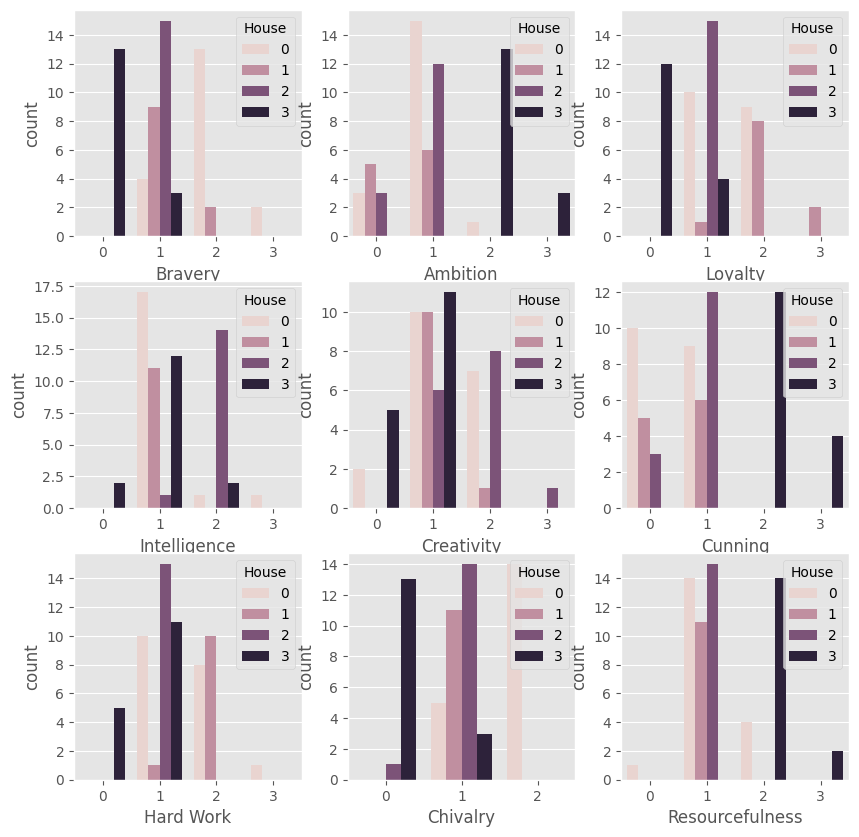

In [ ]:
cat_cols = Harry_df.columns.to_list()
cat_cols.remove('Name')
cat_cols.remove('House')

#X_y = pd.concat([X, y], axis=1)

_, ax = plt.subplots(3, len(cat_cols)//3, figsize=(10, 10))

ax = ax.flatten()

for i, col in enumerate(cat_cols):
    sb.countplot(data=Harry_df, x=col, ax=ax[i], hue='House')

plt.show()

### Selección de las características para la clasificación

para establecer una correlacion entre las variables categoricas es preferible usar la correlacion de CramersV, este valor se mueve entre [0, 1], siendo valores cercanos a 1 que las dos variables estan correlacionadas y valores cercanos a 0 que no lo estan

In [ ]:
def cramers_V(df):
    def get_cramersV_corr(var1, var2):
        from scipy.stats import chi2_contingency
        crosstab = np.array(pd.crosstab(var1, var2, rownames=None, colnames=None))
        stat = chi2_contingency(crosstab)[0]
        obs = np.sum(crosstab)
        mini = min(crosstab.shape) - 1
        return (stat/(obs*mini))


    rows= []
    for var1 in df.columns:
        col = []
        for var2 in df.columns:
            cramers = get_cramersV_corr(df[var1], df[var2])
            col.append(round(cramers,2))
        rows.append(col)

    return pd.DataFrame(rows, columns=df.columns, index=df.columns)

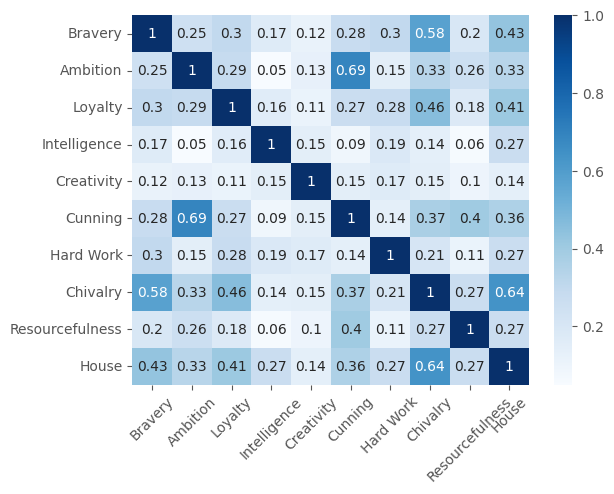

In [ ]:
cat_cols.append('House')
sb.heatmap( cramers_V(Harry_df[cat_cols]) , annot=True, cmap="Blues")

plt.xticks(rotation=45)
plt.show()
cat_cols.remove('House')

### Separar los datos en entrenamiento y prueba

para esto usaremos `train_test_split` de la libreria `sklearn.model_selection`

dependiendo de la cantidad de datos que se tengan puede ser recomendable usar mas o menos datos para el entrenamiento, pueden probar con diferentes valores para `train_size` y ver como cambia el resultado

In [ ]:
from sklearn.model_selection import train_test_split
X=Harry_df[cat_cols]
y=Harry_df["House"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, train_size=.75, stratify=y)

### SelectKBest

Selecciona las K caracteristicas que mas peso tienen en la clasificacion (basado en una funcion de scoring, por defecto `f_classif`)

In [ ]:
from sklearn.feature_selection import SelectKBest



best=SelectKBest(k=5)

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Bravery', 'Loyalty', 'Cunning', 'Chivalry', 'Resourcefulness'], dtype='object')


#### **balanceo de clases**

los arboles de decision tienen un parametro llamado `class_weight` que nos balancea las clases automaticamente, dandole mas peso en la clasificaccion a las clases con mayor peso.

- **pasarle al parametro `class_weight` un diccionario con los pesos para cada clase**

nostros tenemos que las clases se distribuyen

|clase|conteo|
|-----|------|
|0|19|
|1|11|
|2|15|
|3|16|

por lo que podemos pasarle un diccionario con los siguientes pesos

`class_weight = {0: 1, 1: w1, 2: w2, 3: w3}`

donde w1 = 19/11 = 1.73, w2 = 19/15 = 1.27, w3 = 19/16 = 1.1875

- **pasarle al parametro `class_weight` la palabra clave `balanced`**

con este valor, el arbol de decision automaticamente les dara los pesos a las clases usando la siguiente formula: `n_samples / (n_classes * np.bincount(y))`

- **Tambien podemos usar los metodos anteriormente mencionados (recordar hacer el balanceo de clases solo en el dataset de entrenamiento, para evitar introducir fugas de datos)**

### evaluacion de parametros del modelo

usaremas `GridSearchCV` de la libreria `sklearn.model_selection` para evaluar los parametros del modelo

Tenemos varios hiperparámetros, estos son:

* Criterio

* Profundidad Máxima

* Mínimo número para hacer el split

* Mínimo número de samples por cada hoja


El primer parámetro que tenemos es el criterio para decidir cómo hacer el split (gini o entropía)

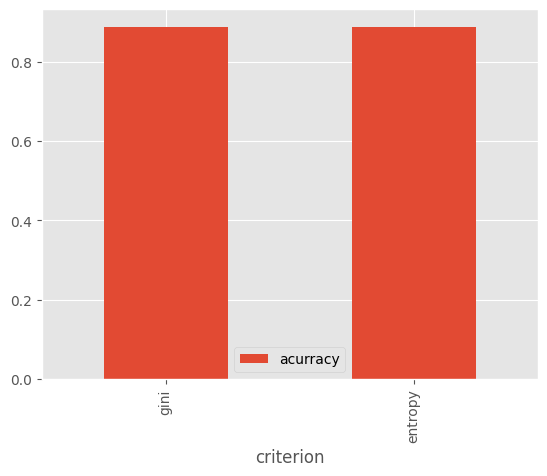

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid = {"criterion": ["gini", "entropy"]}

criterion_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1, 1:1.73, 2:1.27, 3:1.1875}),
    param_grid = grid
)
criterion_model.fit(X_train, y_train)


df_results = pd.DataFrame(criterion_model.cv_results_["params"])
df_results["acurracy"] = criterion_model.cv_results_["mean_test_score"]

df_results.plot.bar(x="criterion", y="acurracy")

plt.show()

Siguiente, veamos qué profundidad del árbol es óptima

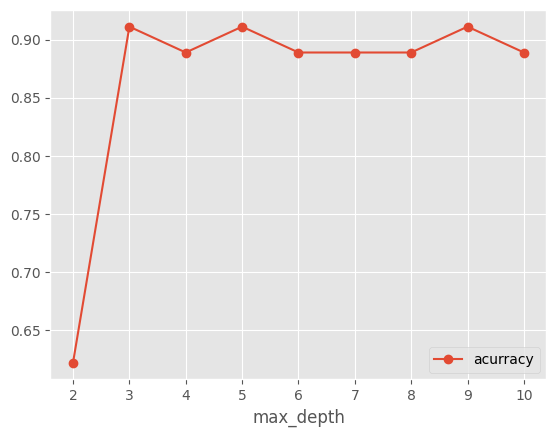

In [ ]:
# evaluar altura del arbol
grid = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]}
max_depth_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1, 1:1.73, 2:1.27, 3:1.1875}),
    param_grid = grid
)
max_depth_model.fit(X_train, y_train)


df_results = pd.DataFrame(max_depth_model.cv_results_["params"])
df_results["acurracy"] = max_depth_model.cv_results_["mean_test_score"]

df_results.plot.line(x="max_depth", y="acurracy", marker="o")

plt.show()

Siguiente, veamos cuál es el mínimo número de samples para hacer un split

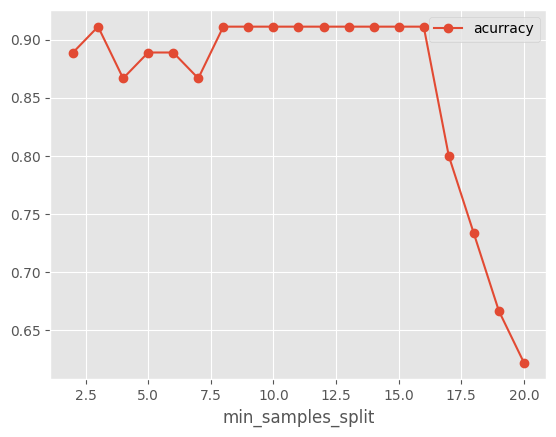

In [ ]:
#  evaluar min_samples_split
grid = {"min_samples_split": range(2, 20 + 1)}
min_samples_split_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1, 1:1.73, 2:1.27, 3:1.1875}),
    param_grid = grid
)
min_samples_split_model.fit(X_train, y_train)


df_results = pd.DataFrame(min_samples_split_model.cv_results_["params"])
df_results["acurracy"] = min_samples_split_model.cv_results_["mean_test_score"]

df_results.plot.line(x="min_samples_split", y="acurracy", marker="o")

plt.show()

Finalmente, veamos mínimamente cuántos samples debería tener cada hoja

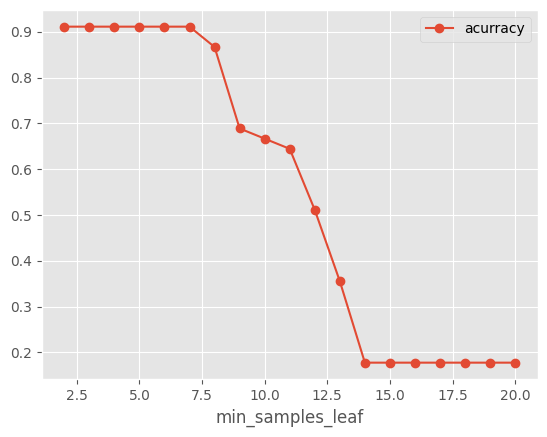

In [ ]:
# evaluar min_samples_leaf
grid = {"min_samples_leaf": range(2, 20 + 1)}
min_samples_leaf_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1, 1:1.73, 2:1.27, 3:1.1875}),
    param_grid = grid
)
min_samples_leaf_model.fit(X_train, y_train)


df_results = pd.DataFrame(min_samples_leaf_model.cv_results_["params"])
df_results["acurracy"] = min_samples_leaf_model.cv_results_["mean_test_score"]

df_results.plot.line(x="min_samples_leaf", y="acurracy", marker="o")

plt.show()

In [ ]:
# evaluar todas a la vez
# (tener cuidado de tener demasiadas variaciones para los parametros, ya que debe entrenar 1 modelo por cada combinacion)
# 2 x 9 x 18 x 18 = 5832 modelos a entrenar !!

grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": range(2, 20 + 1),
    "min_samples_leaf": range(2, 20 + 1),
}

all_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1, 1:1.73, 2:1.27, 3:1.1875}),
    param_grid = grid
)
all_model.fit(X_train, y_train)

display(
    "mejores parametros",
    all_model.best_params_,
    "",
    "mejor accurracy",
    all_model.best_score_
)

'mejores parametros'

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

''

'mejor accurracy'

0.9111111111111111

### Entrenamiento del modelo

In [ ]:
modelo = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight={0:1, 1:1.73, 2:1.27, 3:1.1875}
)

modelo = modelo.fit(X_train_1, y_train_1)

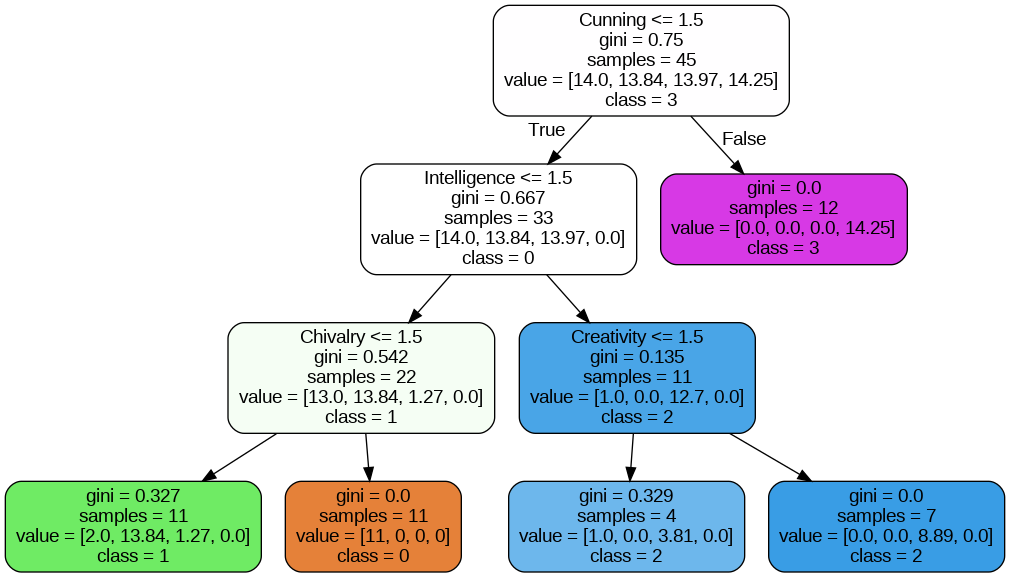

In [ ]:
from IPython.display import Image as PImage
from subprocess import check_call
from sklearn import tree
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(modelo,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = cat_cols,
                              class_names = list(map(str, modelo.classes_)),
                              rounded = True,
                              filled= True )

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

### Evaluación del modelo

Exactitud

In [ ]:
print("exactitud para el entrenamiento =", modelo.score(X_train_1, y_train_1))
print("exactitud para prueba =", modelo.score(X_test_1, y_test_1))

exactitud para el entrenamiento = 0.9111111111111111
exactitud para prueba = 0.875


Matriz de Confusión

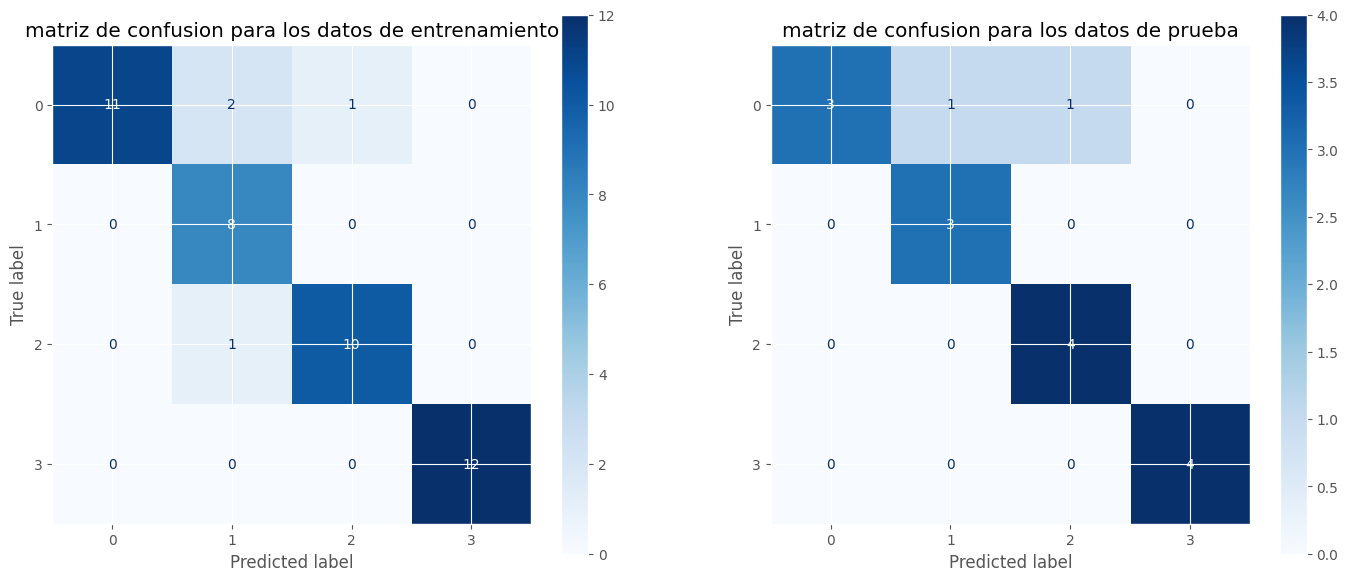

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

cmTrain = ConfusionMatrixDisplay.from_estimator(
    estimator = modelo,
    X = X_train_1,
    y = y_train_1,
    cmap = "Blues",
    ax = ax1
)

cmTest = ConfusionMatrixDisplay.from_estimator(
    estimator = modelo,
    X = X_test_1,
    y = y_test_1,
    cmap="Blues",
    ax = ax2
)

cmTrain.ax_.set_title("matriz de confusion para los datos de entrenamiento")
cmTest.ax_.set_title("matriz de confusion para los datos de prueba")

plt.show()

Resumen de metricas

In [ ]:
from sklearn.metrics import classification_report

print("Metricas para datos de entrenamiento")
print(classification_report(y_train_1, modelo.predict(X_train_1)))

print("//////////////////////////////////////////////////////")

print("Metricas para datos de prueba")
print(classification_report(y_test_1, modelo.predict(X_test_1)))

Metricas para datos de entrenamiento
              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.73      1.00      0.84         8
           2       0.91      0.91      0.91        11
           3       1.00      1.00      1.00        12

    accuracy                           0.91        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.93      0.91      0.91        45

//////////////////////////////////////////////////////
Metricas para datos de prueba
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.75      1.00      0.86         3
           2       0.80      1.00      0.89         4
           3       1.00      1.00      1.00         4

    accuracy                           0.88        16
   macro avg       0.89      0.90      0.87        16
weighted avg       0.90      0.88      0.87        16



In [ ]:
uploaded = files.upload()
nuevos = pd.read_csv(io.BytesIO(uploaded["Hogwarts.csv"]))

Saving Hogwarts.csv to Hogwarts.csv


In [ ]:
nuevos.rename(columns={"Nombres y apellidos:": "Nombre"}, inplace=True)
nuevos.drop(columns="Marca temporal", inplace=True)

for column in nuevos.columns:
  if column != 'Nombre':
    nuevos[column] = nuevos[column].map({'Baja':0, 'Media':1, 'Alta':2, 'Muy Alta':3}).astype(int)
nuevos

,Nombre,Valentía,Ambición,Lealtad,Inteligencia,Creatividad,Astucia,Trabajo Duro,Caballerosidad,Ingenio
0,Juan Felipe López Ramírez,2,1,3,2,3,2,1,3,3
1,Juan Jose Marin Alvarez,2,0,3,1,2,2,3,0,2
2,Santiago Londoño Giraldo,1,2,2,3,1,1,1,2,3
3,Juan Pablo Gómez Reyes,1,3,2,2,3,1,1,0,2
4,Julián David Díaz Jaramillo,3,1,3,2,0,2,3,2,2
5,Felipe Muñoz,2,1,2,2,1,2,1,1,2
6,José Daniel Londoño,2,3,2,2,1,2,1,1,2
7,Kevin Daniel Guio Covilla,1,3,3,2,3,2,3,1,2
8,Esteban Espinosa Parra,3,1,3,2,0,1,3,3,1
9,Miller Johan chica acero,3,2,3,2,2,3,2,1,3


In [ ]:
nuevos_2 = nuevos.copy()
nuevos_2.drop(columns = 'Nombre', inplace=True)
nuevos_2.columns = cat_cols
nuevos["Prediccion"] = modelo.predict(nuevos_2)

nuevos[["Nombre", "Prediccion"]]



,Nombre,Prediccion
0,Juan Felipe López Ramírez,3
1,Juan Jose Marin Alvarez,3
2,Santiago Londoño Giraldo,2
3,Juan Pablo Gómez Reyes,2
4,Julián David Díaz Jaramillo,3
5,Felipe Muñoz,3
6,José Daniel Londoño,3
7,Kevin Daniel Guio Covilla,3
8,Esteban Espinosa Parra,0
9,Miller Johan chica acero,3


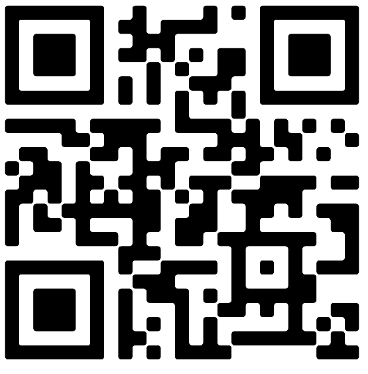

In [ ]:
uploaded = files.upload()
puntajes = pd.read_csv(io.BytesIO(uploaded["quidditch2.csv"]))

Saving quidditch2.csv to quidditch2.csv


In [ ]:
puntaje_est = puntajes[['Nombre Completo:', '¿En qué casa te puso el sombrero?', 'Puntuación']]
puntaje_est.columns = ['Nombre', 'Casa', 'Puntaje']
#puntaje_est.dtypes

In [ ]:
def corr(x):
  x = x.split('/')
  return x[0].rstrip()

puntaje_est['Puntaje'] = puntaje_est['Puntaje'].apply(corr).astype('int64')
puntaje_est

<ipython-input-39-4261c9a6d23c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  puntaje_est['Puntaje'] = puntaje_est['Puntaje'].apply(corr).astype('int64')


,Nombre,Casa,Puntaje
0,Sergio andres arias jimenez,Slytheryn,15
1,acallejasr@unal.edu.co,Hufflepuff,55
2,Daniel Bustamante Mazo,Slytheryn,100
3,Luis Miguel Olaya Orrego,Slytheryn,100
4,Andrés Felipe Villa Arias,Slytheryn,35
5,Juan José Tobón Zapata,Slytheryn,85
6,Cbelloh@unal.edu.co,Slytheryn,35
7,Alejandra Uribe Sierra,Slytheryn,65
8,Kevin Leonardo Arias Orrego,Ravenclaw,85
9,Juan Esteban Cadavid Arango,Gryffindor,100


In [ ]:
puntaje_est.groupby('Casa')['Puntaje'].mean()

,Puntaje
Casa,
Gryffindor,91.250000
Hufflepuff,55.000000
Ravenclaw,73.333333
Slytheryn,56.315789


##**TALLER 6**
###**PARTE II**

¿Qué pasa si entreno mi modelo con otro dataset?

In [ ]:
Harry_df_2 = pd.read_csv("Harry.csv")
Harry_df_2 = Harry_df_2.dropna(how='all')
Harry_df_2

,Character,Bravery,Ambition,Loyalty,Intelligence,Creativity,Cunning,Hard Work,Chivalry,Resourcefulness,House
0,Angelina Johnson,High,Medium,High,Medium,High,Medium,High,Very High,Medium,Gryffindor
1,Alicia Spinnet,High,Medium,High,Medium,High,Medium,High,High,Medium,Gryffindor
2,Katie Bell,Very High,Medium,High,Medium,High,Medium,High,Very High,Medium,Gryffindor
3,Lee Jordan,High,Medium,High,Medium,High,Medium,Medium,High,Medium,Gryffindor
4,Lavender Brown,Medium,Medium,Medium,Medium,High,Medium,Medium,Medium,Medium,Gryffindor
5,Parvati Patil,Medium,Medium,Medium,Medium,High,Medium,Medium,High,Medium,Gryffindor
6,Seamus Finnigan,High,Medium,Medium,Medium,Medium,Medium,Medium,High,Medium,Gryffindor
7,Dean Thomas,High,Medium,High,Medium,High,Medium,Medium,High,Medium,Gryffindor
8,Cormac McLaggen,Very High,High,Medium,Medium,High,High,Medium,Very High,High,Gryffindor
9,Romilda Vane,Medium,High,Medium,Medium,Medium,High,Medium,High,High,Gryffindor


In [ ]:
for column in Harry_df_2.columns:
  if column != 'Character' and column != 'House':
    Harry_df_2[column] = Harry_df_2[column].map({'Low':0, 'Medium':1, 'High':2, 'Very High':3}).astype(int)
Harry_df_2['House'] = label_encoding.fit_transform(Harry_df_2['House']).astype(int)

In [ ]:
Harry_df_2

,Character,Bravery,Ambition,Loyalty,Intelligence,Creativity,Cunning,Hard Work,Chivalry,Resourcefulness,House
0,Angelina Johnson,2,1,2,1,2,1,2,3,1,0
1,Alicia Spinnet,2,1,2,1,2,1,2,2,1,0
2,Katie Bell,3,1,2,1,2,1,2,3,1,0
3,Lee Jordan,2,1,2,1,2,1,1,2,1,0
4,Lavender Brown,1,1,1,1,2,1,1,1,1,0
5,Parvati Patil,1,1,1,1,2,1,1,2,1,0
6,Seamus Finnigan,2,1,1,1,1,1,1,2,1,0
7,Dean Thomas,2,1,2,1,2,1,1,2,1,0
8,Cormac McLaggen,3,2,1,1,2,2,1,3,2,0
9,Romilda Vane,1,2,1,1,1,2,1,2,2,0


In [ ]:
X=Harry_df_2[['Bravery', 'Ambition', 'Loyalty', 'Intelligence', 'Creativity', 'Cunning', 'Hard Work', 'Chivalry', 'Resourcefulness']]
y=Harry_df_2["House"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, stratify=y)

In [ ]:
modelo_2 = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2,
)

modelo_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [ ]:
modelo_2.score(X_test, y_test)

0.7

In [ ]:
modelo_2.score(X_test_1, y_test_1)

0.5625

Es evidente que nos enfrentamos ante un problema de varianza. Veamos una posible solución:

### Random Forest (BAGGING)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=73, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
rf.score(X_test, y_test)

0.8461538461538461

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.67      0.80         3
           2       1.00      0.67      0.80         3
           3       1.00      1.00      1.00         3

    accuracy                           0.85        13
   macro avg       0.92      0.83      0.85        13
weighted avg       0.90      0.85      0.85        13



In [ ]:
features_then = pd.DataFrame(modelo.feature_importances_, index=X.columns)
features_then

,0
Bravery,0.000000
Ambition,0.000000
Loyalty,0.000000
Intelligence,0.311129
Creativity,0.002480
Cunning,0.408506
Hard Work,0.000000
Chivalry,0.277884
Resourcefulness,0.000000


In [ ]:
features = pd.DataFrame(rf.feature_importances_, index=X.columns)

In [ ]:
features

,0
Bravery,0.108758
Ambition,0.133158
Loyalty,0.108337
Intelligence,0.179112
Creativity,0.034687
Cunning,0.177168
Hard Work,0.080708
Chivalry,0.131752
Resourcefulness,0.046320


In [ ]:
rf2 = RandomForestClassifier(n_estimators = 100,
                             criterion = 'gini',
                             min_samples_split = 2,
                             min_samples_leaf = 2,
                             max_depth = 3,
                             random_state = 42)


In [ ]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

In [ ]:
rf2.score(X_test, y_test)

0.8461538461538461

In [ ]:
y_pred2 = rf2.predict(X_test)

In [ ]:
features_now = pd.DataFrame(rf2.feature_importances_, index=X.columns)

In [ ]:
features_now

,0
Bravery,0.158264
Ambition,0.154118
Loyalty,0.107924
Intelligence,0.207912
Creativity,0.019228
Cunning,0.130450
Hard Work,0.067690
Chivalry,0.118825
Resourcefulness,0.035588
